In [198]:
import pandas as pd 
import nltk 
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anishkamukherjee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [199]:
df = pd.read_csv("/Users/anishkamukherjee/Documents/msg_spam/data/spam.csv", encoding="latin-1")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [201]:
df.columns[2:].tolist()

['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [202]:
new_df = df.drop(df.columns[2:].tolist(), axis=1)
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [203]:
new_df.isna().sum()

v1    0
v2    0
dtype: int64

In [204]:
new_df.shape, new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


((5572, 2), None)

In [205]:
# Rename the columns 
new_df.rename(columns={'v1': 'result', 'v2': 'text'}, inplace=True)

In [206]:
new_df.head()

,result,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [207]:
# Label Encoding the target features 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df["result"] = le.fit_transform(new_df["result"])

In [208]:
new_df.head(5)

,result,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Perform EDA

In [209]:
new_df["num_chars"] = new_df["text"].apply(len)
new_df.head(5)

,result,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [210]:
new_df["num_words"] = new_df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [211]:
new_df.head(5)

,result,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [212]:
new_df["num_sents"] = new_df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
new_df.head(5)

,result,text,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


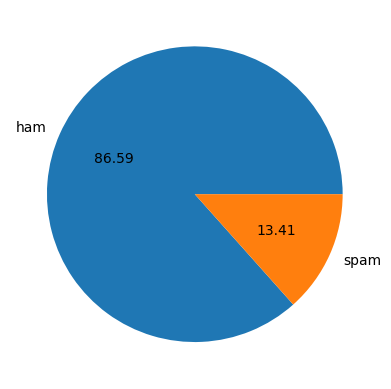

In [213]:
import matplotlib.pyplot as plt 

plt.pie(new_df["result"].value_counts(), labels=['ham', 'spam'], autopct = "%0.2f")
plt.show();

In [214]:
new_df[new_df["result"] == 0].describe()
# The mean number of characters used in a ham message is 72 and mean words used is 17

,result,num_chars,num_words,num_sents
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,17.276269,1.837720
std,0.0,58.016023,13.988585,1.454388
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [215]:
new_df[new_df["result"] == 1].describe()
# The mean number of words in a spam message is 27 with 128 characters as the mean number of characters

,result,num_chars,num_words,num_sents
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,27.891566,3.021419
std,0.0,29.183082,6.867007,1.537580
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

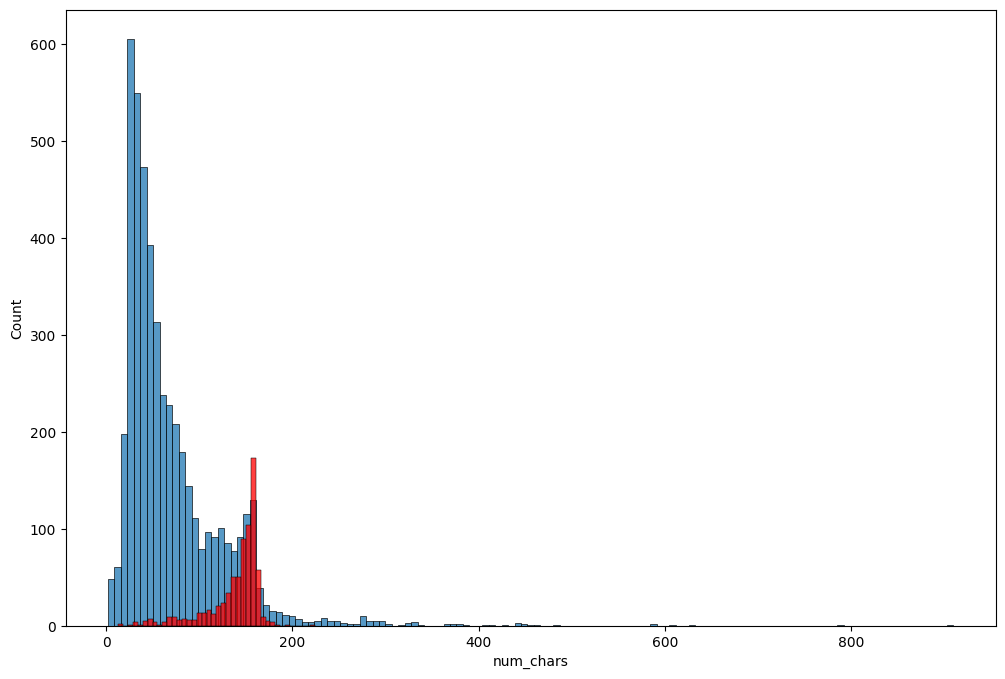

In [216]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(new_df[new_df["result"] == 0]["num_chars"])
sns.histplot(new_df[new_df["result"] == 1]["num_chars"], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

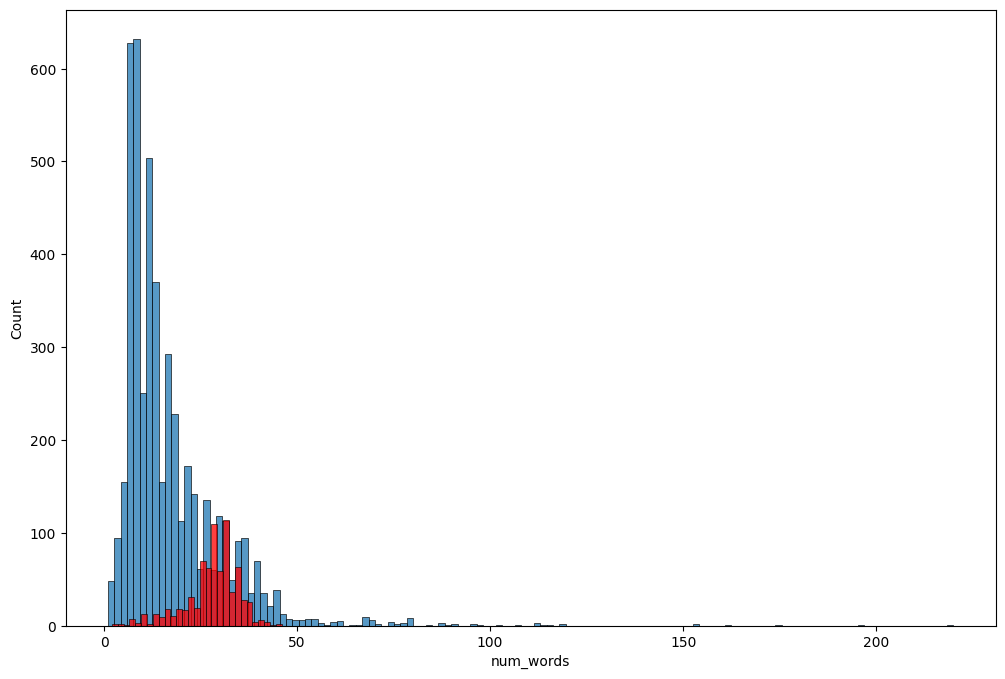

In [217]:
plt.figure(figsize=(12, 8))
sns.histplot(new_df[new_df["result"] == 0]["num_words"])
sns.histplot(new_df[new_df["result"] == 1]["num_words"], color='red')

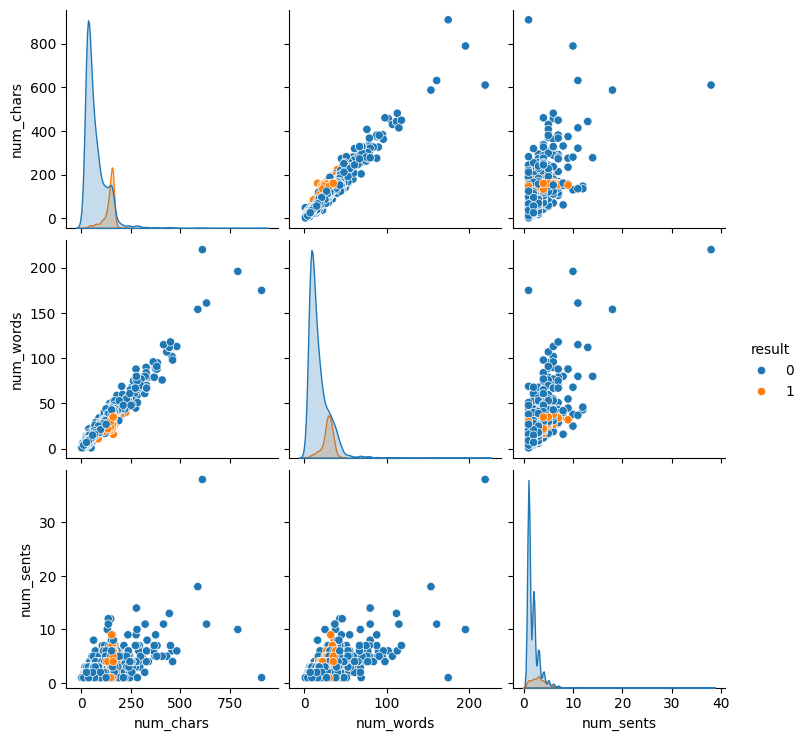

In [218]:
sns.pairplot(new_df, hue="result")

### As we can visually observe from the above 2 plots, the data is mostly linear but has a few outliers.

<Axes: >

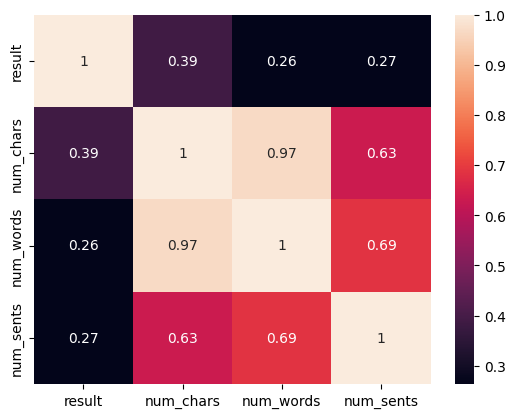

In [219]:
numeric_df = new_df.drop(columns=['text'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)

### Perform Text Preprocessing

In [220]:
new_df["text"] = new_df["text"].str.lower()
new_df.head(2)

,result,text,num_chars,num_words,num_sents
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2


In [221]:
# remove html tags if present
import re

def remove_html(col):
    if isinstance(col, str):
        pattern = re.compile(r'<,*?>')
        return pattern.sub('', col)
    else:
        return col
new_df["text"] = new_df["text"].apply(remove_html)
new_df.head(2)

,result,text,num_chars,num_words,num_sents
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2


In [222]:
def remove_urls(text):
    if isinstance(text, str):
        pattern = re.compile(r'http://\S+|https://\S+|www\.\S+')
        return pattern.sub('', text)
    else:
        return text
new_df["text"] = new_df["text"].apply(remove_urls)
new_df["text"][2100]

'oh howda gud gud.. mathe en samachara chikku:-)'

In [223]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_transformer(text):
    text = nltk.word_tokenize(text) # Tokenization
    y = [i for i in text if i.isalnum()] # Remove special characters
    texts = y[:]
    y.clear()
    y = [i for i in texts if i not in stopwords.words('english') and i not in string.punctuation] # Remove stop words and punctuation
    texts = y[:]
    y.clear()
    y = [ps.stem(i) for i in texts] # Stemming
    return ' '.join(y)

In [224]:
text_transformer("Hi! How are you Anishka? I loved the Yt lectures on machine Learning!")

'hi how anishka i love yt lectur machin learn'

In [225]:
new_df["text_trans"] = new_df["text"].apply(text_transformer)

In [226]:
new_df.head(2)

,result,text,num_chars,num_words,num_sents,text_trans
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joke wif u oni


In [231]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, background_color="white")

In [233]:
ham_wc = wc.generate(new_df[new_df["result"] == 0]["text_trans"].str.cat(sep=" "))

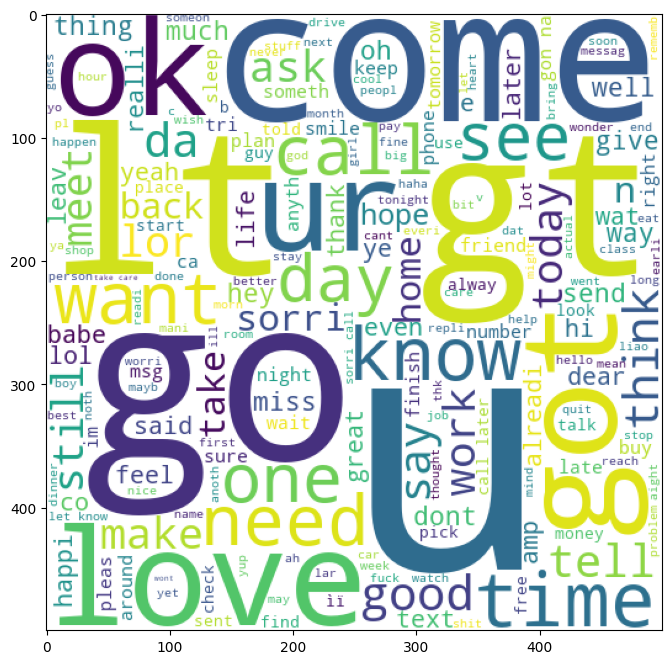

In [234]:
plt.figure(figsize=(12, 8))
plt.imshow(ham_wc)
plt.show()

In [236]:
spam_wc = wc.generate(new_df[new_df["result"] == 1]["text_trans"].str.cat(sep=" "))

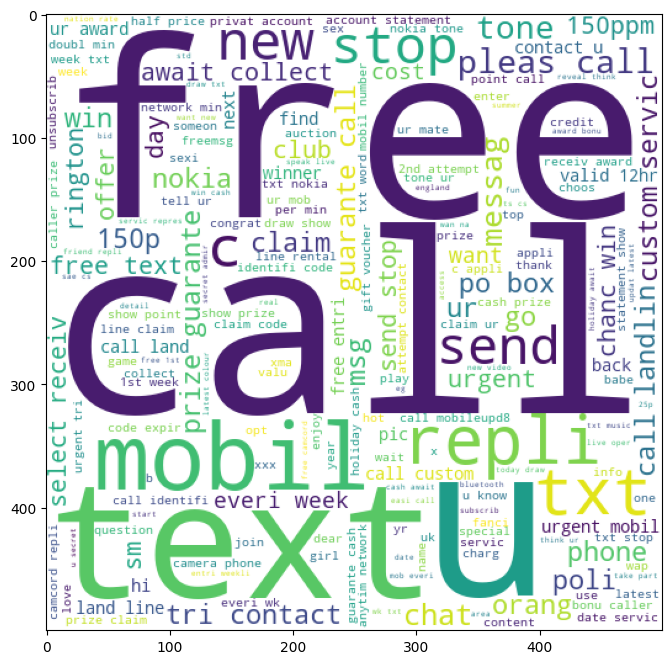

In [237]:
plt.figure(figsize=(12, 8))
plt.imshow(spam_wc)
plt.show()

In [269]:
# Lets find the top 30 words used in both ham and spam..

spam_corpus = []
for sents in new_df[new_df["result"] == 1]["text_trans"].tolist():
    for words in sents.split():
        spam_corpus.append(words)

In [270]:
len(spam_corpus)

11472

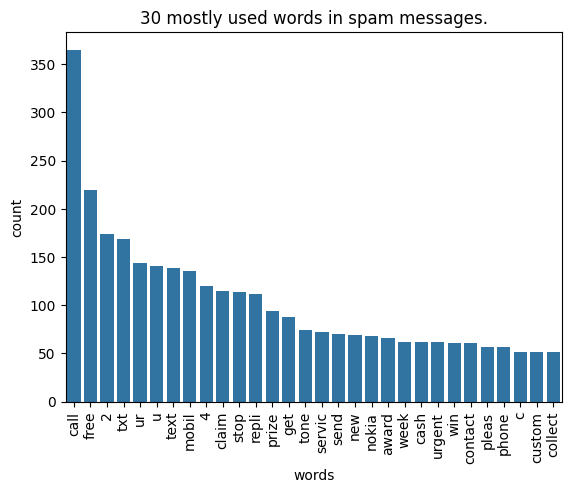

In [271]:
from collections import Counter

common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['words', 'count'])

sns.barplot(x='words', y='count', data=common_words_df)
plt.title("30 mostly used words in spam messages.")
plt.xticks(rotation='vertical')
plt.show();

In [273]:
ham_corpus = []
for texts in new_df[new_df["result"] == 0]["text_trans"]:
    for words in texts.split():
        ham_corpus.append(words)

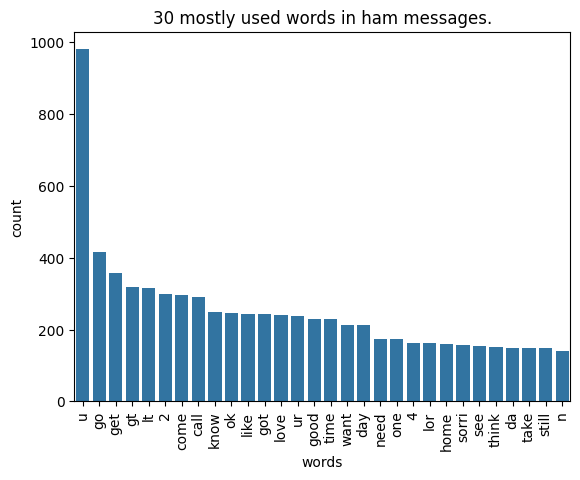

In [274]:
common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['words', 'count'])

sns.barplot(x='words', y='count', data=common_words_df)
plt.title("30 mostly used words in ham messages.")
plt.xticks(rotation='vertical')
plt.show();

In [276]:
new_df.head(5)

,result,text,num_chars,num_words,num_sents,text_trans
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [277]:
new_df.to_csv("/Users/anishkamukherjee/Documents/msg_spam/data/new_spam.csv", index=False)